In [1]:
import pandas
import numpy
import matplotlib.pyplot as plotter
from pathlib import Path
import seaborn

In [2]:
data = Path("../data/summer_power/")
files = list(data.iterdir())
print(files)

[PosixPath('../data/summer_power/summer_disk_io.csv'), PosixPath('../data/summer_power/summer_network_tx.csv'), PosixPath('../data/summer_power/summer_power.csv'), PosixPath('../data/summer_power/summer_network_rx.csv'), PosixPath('../data/summer_power/summer_cpu.csv'), PosixPath('../data/summer_power/summer_context.csv')]


In [3]:
disk = pandas.read_csv(str(data/"summer_disk_io.csv")).drop("Unnamed: 0", axis=1)
print(disk.columns)
cpu = pandas.read_csv(str(data/"summer_cpu.csv")).drop("Unnamed: 0", axis=1)
print(cpu.columns)
power = pandas.read_csv(str(data/"summer_power.csv")).drop("Unnamed: 0", axis=1)
context = pandas.read_csv(str(data/"summer_context.csv")).drop("Unnamed: 0", axis=1)
tx = pandas.read_csv(str(data/"summer_network_tx.csv")).drop("Unnamed: 0", axis=1)

Index(['Time',
       'disk_io_time host raspberrypi_pc008 instance mmcblk0 type disk_io_time',
       'disk_io_time host raspberrypi_pc008 instance mmcblk0p1 type disk_io_time',
       'disk_io_time host raspberrypi_pc008 instance mmcblk0p2 type disk_io_time'],
      dtype='object')
Index(['Time', 'cpu_value host raspberrypi_pc008 type_instance idle',
       'cpu_value host raspberrypi_pc008 type_instance interrupt',
       'cpu_value host raspberrypi_pc008 type_instance nice',
       'cpu_value host raspberrypi_pc008 type_instance softirq',
       'cpu_value host raspberrypi_pc008 type_instance steal',
       'cpu_value host raspberrypi_pc008 type_instance system',
       'cpu_value host raspberrypi_pc008 type_instance user',
       'cpu_value host raspberrypi_pc008 type_instance wait'],
      dtype='object')


In [4]:
cpu = cpu.drop(cpu.columns[2], axis=1)
cpu = cpu.drop(cpu.columns[2], axis=1)
cpu = cpu.drop(cpu.columns[3], axis=1)
cpu.describe()

,cpu_value host raspberrypi_pc008 type_instance idle,cpu_value host raspberrypi_pc008 type_instance softirq,cpu_value host raspberrypi_pc008 type_instance system,cpu_value host raspberrypi_pc008 type_instance user,cpu_value host raspberrypi_pc008 type_instance wait
count,7909.000000,7909.000000,7909.000000,7909.000000,7908.000000
mean,402.823613,0.058325,5.622566,88.952986,0.113319
std,57.832670,0.102268,0.786840,58.188760,0.222917
min,299.916667,0.000000,3.041667,6.291667,0.000000
25%,357.833333,0.000000,5.083333,9.750000,0.000000
50%,359.375000,0.000000,5.583333,133.041667,0.000000
75%,481.333333,0.083333,6.125000,134.083333,0.166667
max,485.875000,0.750000,15.666667,182.375000,4.083333


In [5]:
power.describe()

,Power8 type Power8
count,7920.000000
mean,1527.131323
std,138.929559
min,1251.219512
25%,1400.558943
50%,1555.487805
75%,1617.987805
max,2203.658537


In [6]:
tx = tx.drop(tx.columns[1], axis=1)
tx = tx.drop(tx.columns[1], axis=1)
tx = tx.drop(tx.columns[1], axis=1)
tx = tx.drop(tx.columns[1], axis=1)
tx = tx.drop(tx.columns[1], axis=1)
tx = tx.drop(tx.columns[1], axis=1)
tx.describe()

,interface_tx host raspberrypi_pc008 instance wlan0 type if_octets,interface_tx host raspberrypi_pc008 instance wlan0 type if_packets
count,7909.000000,7909.000000
mean,18467.550449,30.265120
std,7270.378907,5.123137
min,12436.333333,18.000000
25%,16657.333333,29.000000
50%,16792.833333,30.000000
75%,17467.833333,30.500000
max,67712.500000,65.333333


In [7]:
cpu_power = pandas.concat([cpu, power], axis=1, join="inner")
cpu_power.head(10)

,Time,cpu_value host raspberrypi_pc008 type_instance idle,cpu_value host raspberrypi_pc008 type_instance softirq,cpu_value host raspberrypi_pc008 type_instance system,cpu_value host raspberrypi_pc008 type_instance user,cpu_value host raspberrypi_pc008 type_instance wait,Time,Power8 type Power8
0,2018-06-15 04:00:05+00:00,395.333333,0.000,5.375000,96.875000,0.000000,2018-06-15 04:00:00+00:00,1580.081301
1,2018-06-15 04:00:10+00:00,482.500000,0.250,5.458333,8.791667,0.000000,2018-06-15 04:00:05+00:00,1410.975610
2,2018-06-15 04:00:15+00:00,482.625000,0.000,6.541667,8.083333,0.000000,2018-06-15 04:00:10+00:00,1356.504065
3,2018-06-15 04:00:20+00:00,484.208333,0.000,4.958333,7.666667,0.666667,2018-06-15 04:00:15+00:00,1640.853659
4,2018-06-15 04:00:25+00:00,481.291667,0.000,5.791667,10.458333,0.458333,2018-06-15 04:00:20+00:00,1328.048780
5,2018-06-15 04:00:30+00:00,483.041667,0.000,5.708333,8.041667,0.125000,2018-06-15 04:00:25+00:00,1387.804878
6,2018-06-15 04:00:35+00:00,481.958333,0.000,5.791667,8.583333,0.000000,2018-06-15 04:00:30+00:00,1384.756098
7,2018-06-15 04:00:40+00:00,481.541667,0.000,5.958333,9.333333,0.000000,2018-06-15 04:00:35+00:00,1368.292683
8,2018-06-15 04:00:45+00:00,481.958333,0.125,6.666667,9.291667,0.250000,2018-06-15 04:00:40+00:00,1336.991870
9,2018-06-15 04:00:50+00:00,480.375000,0.125,6.083333,9.708333,0.000000,2018-06-15 04:00:45+00:00,1345.731707


In [8]:
corr = cpu_power.corr().fillna(0)
corr

,cpu_value host raspberrypi_pc008 type_instance idle,cpu_value host raspberrypi_pc008 type_instance softirq,cpu_value host raspberrypi_pc008 type_instance system,cpu_value host raspberrypi_pc008 type_instance user,cpu_value host raspberrypi_pc008 type_instance wait,Power8 type Power8
cpu_value host raspberrypi_pc008 type_instance idle,1.000000,-0.051928,0.054160,-0.999856,-0.016231,-0.199905
cpu_value host raspberrypi_pc008 type_instance softirq,-0.051928,1.000000,-0.014436,0.051969,-0.008266,0.022434
cpu_value host raspberrypi_pc008 type_instance system,0.054160,-0.014436,1.000000,-0.064552,0.050277,-0.025519
cpu_value host raspberrypi_pc008 type_instance user,-0.999856,0.051969,-0.064552,1.000000,0.011810,0.200803
cpu_value host raspberrypi_pc008 type_instance wait,-0.016231,-0.008266,0.050277,0.011810,1.000000,0.011640
Power8 type Power8,-0.199905,0.022434,-0.025519,0.200803,0.011640,1.000000


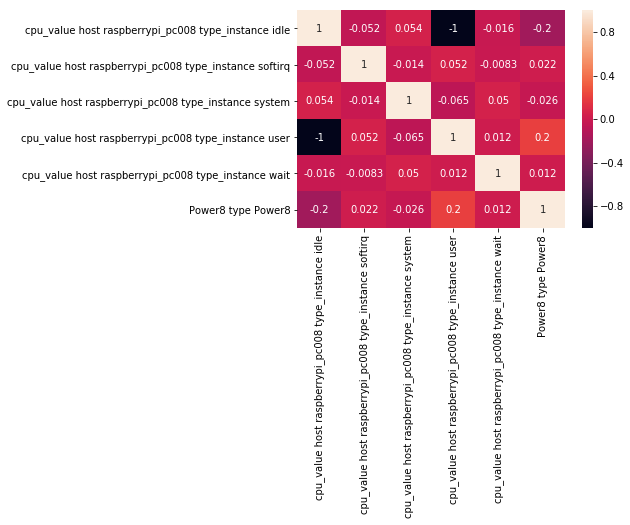

In [9]:
seaborn.heatmap(corr, annot=True)
plotter.show()

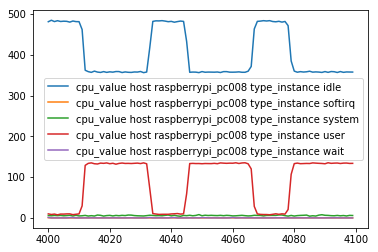

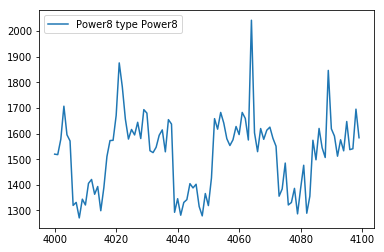

In [10]:
cpu[4000:4100].plot()
plotter.show()
power[4000:4100].plot()
plotter.show()

In [11]:
disk_power = pandas.concat([disk, power], axis=1, join="inner")
disk_power.head(10)

,Time,disk_io_time host raspberrypi_pc008 instance mmcblk0 type disk_io_time,disk_io_time host raspberrypi_pc008 instance mmcblk0p1 type disk_io_time,disk_io_time host raspberrypi_pc008 instance mmcblk0p2 type disk_io_time,Time,Power8 type Power8
0,2018-06-15 04:00:05+00:00,10.000000,0,10.000000,2018-06-15 04:00:00+00:00,1580.081301
1,2018-06-15 04:00:10+00:00,10.000000,0,10.000000,2018-06-15 04:00:05+00:00,1410.975610
2,2018-06-15 04:00:15+00:00,0.000000,0,0.000000,2018-06-15 04:00:10+00:00,1356.504065
3,2018-06-15 04:00:20+00:00,43.333333,0,43.333333,2018-06-15 04:00:15+00:00,1640.853659
4,2018-06-15 04:00:25+00:00,16.666667,0,16.666667,2018-06-15 04:00:20+00:00,1328.048780
5,2018-06-15 04:00:30+00:00,0.000000,0,0.000000,2018-06-15 04:00:25+00:00,1387.804878
6,2018-06-15 04:00:35+00:00,0.000000,0,0.000000,2018-06-15 04:00:30+00:00,1384.756098
7,2018-06-15 04:00:40+00:00,0.000000,0,0.000000,2018-06-15 04:00:35+00:00,1368.292683
8,2018-06-15 04:00:45+00:00,10.000000,0,10.000000,2018-06-15 04:00:40+00:00,1336.991870
9,2018-06-15 04:00:50+00:00,10.000000,0,10.000000,2018-06-15 04:00:45+00:00,1345.731707


In [12]:
corr = disk_power.corr().fillna(0)
corr

,disk_io_time host raspberrypi_pc008 instance mmcblk0 type disk_io_time,disk_io_time host raspberrypi_pc008 instance mmcblk0p1 type disk_io_time,disk_io_time host raspberrypi_pc008 instance mmcblk0p2 type disk_io_time,Power8 type Power8
disk_io_time host raspberrypi_pc008 instance mmcblk0 type disk_io_time,1.000000,0.0,0.999986,0.019292
disk_io_time host raspberrypi_pc008 instance mmcblk0p1 type disk_io_time,0.000000,0.0,0.000000,0.000000
disk_io_time host raspberrypi_pc008 instance mmcblk0p2 type disk_io_time,0.999986,0.0,1.000000,0.019352
Power8 type Power8,0.019292,0.0,0.019352,1.000000


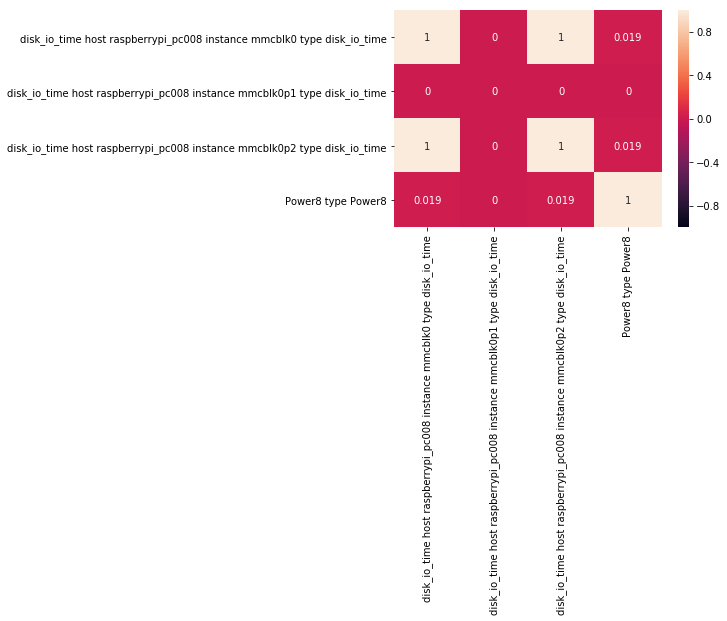

In [13]:
seaborn.heatmap(corr, annot=True, vmin=-1.0)
plotter.show()

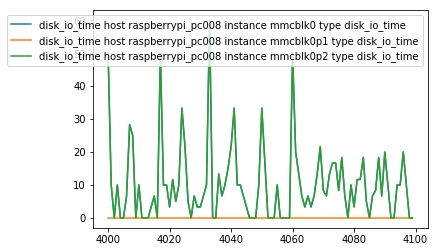

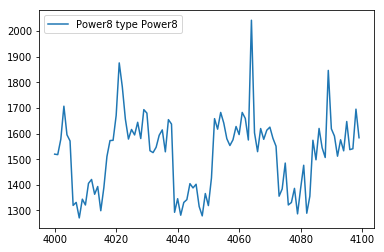

In [14]:
disk[4000:4100].plot()
plotter.show()
power[4000:4100].plot()
plotter.show()

In [15]:
context_power = pandas.concat([context, power], axis=1, join="inner")
context_power.head(10)

,Time,contextswitch_value host raspberrypi_pc008 type contextswitch,Time,Power8 type Power8
0,2018-06-15 04:00:05+00:00,1712.333333,2018-06-15 04:00:00+00:00,1580.081301
1,2018-06-15 04:00:10+00:00,1584.666667,2018-06-15 04:00:05+00:00,1410.975610
2,2018-06-15 04:00:15+00:00,1749.333333,2018-06-15 04:00:10+00:00,1356.504065
3,2018-06-15 04:00:20+00:00,2135.000000,2018-06-15 04:00:15+00:00,1640.853659
4,2018-06-15 04:00:25+00:00,2241.500000,2018-06-15 04:00:20+00:00,1328.048780
5,2018-06-15 04:00:30+00:00,1936.833333,2018-06-15 04:00:25+00:00,1387.804878
6,2018-06-15 04:00:35+00:00,2189.666667,2018-06-15 04:00:30+00:00,1384.756098
7,2018-06-15 04:00:40+00:00,3296.333333,2018-06-15 04:00:35+00:00,1368.292683
8,2018-06-15 04:00:45+00:00,3569.166667,2018-06-15 04:00:40+00:00,1336.991870
9,2018-06-15 04:00:50+00:00,3342.166667,2018-06-15 04:00:45+00:00,1345.731707


In [16]:
corr = context_power.corr().fillna(0)
corr

,contextswitch_value host raspberrypi_pc008 type contextswitch,Power8 type Power8
contextswitch_value host raspberrypi_pc008 type contextswitch,1.000000,-0.234863
Power8 type Power8,-0.234863,1.000000


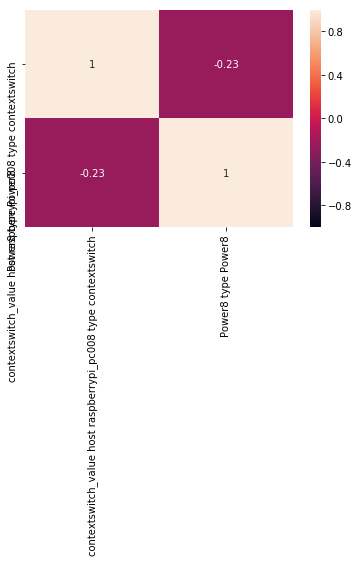

In [17]:
seaborn.heatmap(corr, annot=True,vmin=-1.0)
plotter.show()

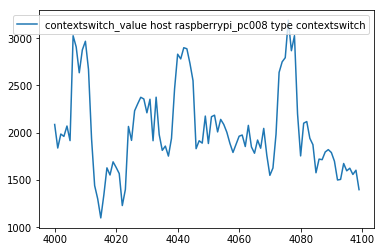

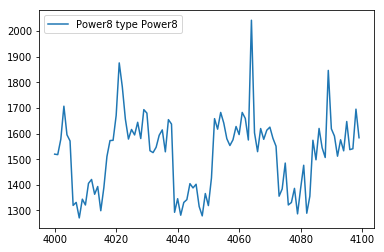

In [18]:
context[4000:4100].plot()
plotter.show()
power[4000:4100].plot()
plotter.show()

In [19]:
tx_power = pandas.concat([tx, power], axis=1, join="inner")
tx_power.head(10)

,Time,interface_tx host raspberrypi_pc008 instance wlan0 type if_octets,interface_tx host raspberrypi_pc008 instance wlan0 type if_packets,Time,Power8 type Power8
0,2018-06-15 04:00:05+00:00,67141.166667,62.500000,2018-06-15 04:00:00+00:00,1580.081301
1,2018-06-15 04:00:10+00:00,17474.166667,30.500000,2018-06-15 04:00:05+00:00,1410.975610
2,2018-06-15 04:00:15+00:00,16195.333333,26.500000,2018-06-15 04:00:10+00:00,1356.504065
3,2018-06-15 04:00:20+00:00,16648.666667,26.833333,2018-06-15 04:00:15+00:00,1640.853659
4,2018-06-15 04:00:25+00:00,17763.333333,31.666667,2018-06-15 04:00:20+00:00,1328.048780
5,2018-06-15 04:00:30+00:00,17494.000000,30.000000,2018-06-15 04:00:25+00:00,1387.804878
6,2018-06-15 04:00:35+00:00,17082.500000,30.000000,2018-06-15 04:00:30+00:00,1384.756098
7,2018-06-15 04:00:40+00:00,17541.166667,30.333333,2018-06-15 04:00:35+00:00,1368.292683
8,2018-06-15 04:00:45+00:00,17714.333333,30.166667,2018-06-15 04:00:40+00:00,1336.991870
9,2018-06-15 04:00:50+00:00,17094.333333,28.500000,2018-06-15 04:00:45+00:00,1345.731707


In [20]:
corr = tx_power.corr().fillna(0)
corr

,interface_tx host raspberrypi_pc008 instance wlan0 type if_octets,interface_tx host raspberrypi_pc008 instance wlan0 type if_packets,Power8 type Power8
interface_tx host raspberrypi_pc008 instance wlan0 type if_octets,1.000000,0.949956,0.134606
interface_tx host raspberrypi_pc008 instance wlan0 type if_packets,0.949956,1.000000,0.123435
Power8 type Power8,0.134606,0.123435,1.000000


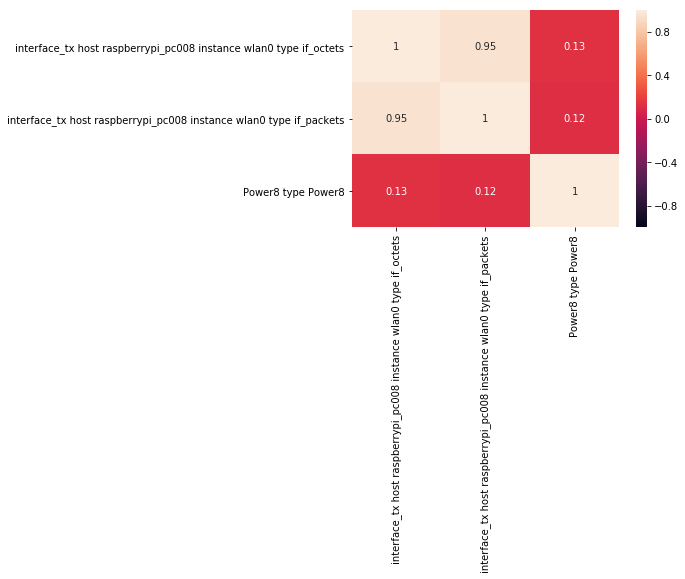

In [21]:
seaborn.heatmap(corr, annot=True,vmin=-1.0)
plotter.show()

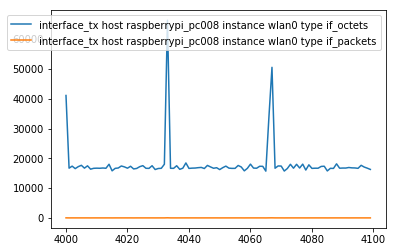

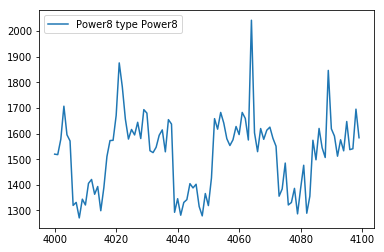

In [22]:
tx[4000:4100].plot()
plotter.show()
power[4000:4100].plot()
plotter.show()

In [23]:
all_data = pandas.concat([cpu, tx, context, disk, power], axis=1, join="inner").drop("Time", axis=1)
all_data.describe()

,cpu_value host raspberrypi_pc008 type_instance idle,cpu_value host raspberrypi_pc008 type_instance softirq,cpu_value host raspberrypi_pc008 type_instance system,cpu_value host raspberrypi_pc008 type_instance user,cpu_value host raspberrypi_pc008 type_instance wait,interface_tx host raspberrypi_pc008 instance wlan0 type if_octets,interface_tx host raspberrypi_pc008 instance wlan0 type if_packets,contextswitch_value host raspberrypi_pc008 type contextswitch,disk_io_time host raspberrypi_pc008 instance mmcblk0 type disk_io_time,disk_io_time host raspberrypi_pc008 instance mmcblk0p1 type disk_io_time,disk_io_time host raspberrypi_pc008 instance mmcblk0p2 type disk_io_time,Power8 type Power8
count,7909.000000,7909.000000,7909.000000,7909.000000,7908.000000,7909.000000,7909.000000,7909.000000,7909.000000,7909.0,7909.000000,7909.000000
mean,402.823613,0.058325,5.622566,88.952986,0.113319,18467.550449,30.265120,2145.400367,10.275003,0.0,10.275003,1527.283418
std,57.832670,0.102268,0.786840,58.188760,0.222917,7270.378907,5.123137,457.884614,15.014999,0.0,15.014929,138.916796
min,299.916667,0.000000,3.041667,6.291667,0.000000,12436.333333,18.000000,1031.166667,0.000000,0.0,0.000000,1251.219512
25%,357.833333,0.000000,5.083333,9.750000,0.000000,16657.333333,29.000000,1819.500000,0.000000,0.0,0.000000,1400.609756
50%,359.375000,0.000000,5.583333,133.041667,0.000000,16792.833333,30.000000,2063.666667,6.666667,0.0,6.666667,1555.487805
75%,481.333333,0.083333,6.125000,134.083333,0.166667,17467.833333,30.500000,2399.500000,13.333333,0.0,13.333333,1618.292683
max,485.875000,0.750000,15.666667,182.375000,4.083333,67712.500000,65.333333,3903.500000,616.666667,0.0,616.666667,2203.658537


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
columns = list(map(lambda x: x.split()[-1], list(all_data.columns)))
columns

['idle',
 'softirq',
 'system',
 'user',
 'wait',
 'if_octets',
 'if_packets',
 'contextswitch',
 'disk_io_time',
 'disk_io_time',
 'disk_io_time',
 'Power8']

In [26]:
scaler = StandardScaler()
data = pandas.DataFrame(scaler.fit_transform(all_data.fillna(0)), columns=columns)
data.describe()

,idle,softirq,system,user,wait,if_octets,if_packets,contextswitch,disk_io_time,disk_io_time,disk_io_time,Power8
count,7.909000e+03,7.909000e+03,7.909000e+03,7.909000e+03,7.909000e+03,7.909000e+03,7.909000e+03,7.909000e+03,7.909000e+03,7909.0,7.909000e+03,7.909000e+03
mean,-1.915833e-16,-1.572196e-17,3.638511e-16,1.448666e-17,1.078077e-17,-3.157868e-16,-1.718186e-16,1.671020e-16,5.031027e-17,0.0,3.773270e-17,1.422164e-15
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,0.0,1.000063e+00,1.000063e+00
min,-1.779504e+00,-5.703493e-01,-3.280289e+00,-1.420662e+00,-5.083362e-01,-8.296127e-01,-2.394216e+00,-2.433592e+00,-6.843592e-01,0.0,-6.843624e-01,-1.987386e+00
25%,-7.779880e-01,-5.703493e-01,-6.853578e-01,-1.361225e+00,-5.083362e-01,-2.490010e-01,-2.469581e-01,-7.117972e-01,-6.843592e-01,0.0,-6.843624e-01,-9.119248e-01
50%,-7.513290e-01,-5.703493e-01,-4.986429e-02,7.577317e-01,-5.083362e-01,-2.303625e-01,-5.175280e-02,-1.785141e-01,-2.403307e-01,0.0,-2.403318e-01,2.030436e-01
75%,1.357618e+00,2.445532e-01,6.385870e-01,7.756343e-01,2.394075e-01,-1.375142e-01,4.584983e-02,5.549776e-01,2.036979e-01,0.0,2.036988e-01,6.551765e-01
max,1.436154e+00,6.763773e+00,1.276592e+01,1.605601e+00,1.781138e+01,6.773796e+00,6.845500e+00,3.839856e+00,4.038828e+01,0.0,4.038847e+01,4.869230e+00


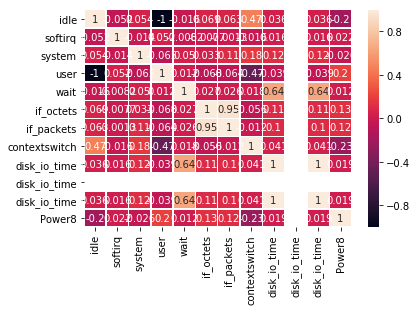

In [28]:
corr = data.corr()
seaborn.heatmap(corr, annot=True, vmin=-1.0, linewidths=0.5)
plotter.savefig("/home/adityas/Downloads/heatmap.png", dpi=500)
plotter.show()

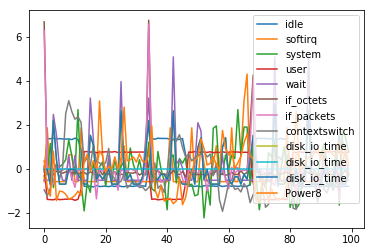

In [29]:
data[:100].plot()
plotter.show()